In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin
import warnings
warnings.filterwarnings('ignore')

print("Libray imported")

Libray imported


# Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning 

## 1. Load and Inspect: Load the telecom_churn.csv dataset.

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Give class is imbalance.
No_Churn = df[df['Churn'] == 'No']['Churn'].count()
Yes_Churn = df[df['Churn'] == 'Yes']['Churn'].count()
print(f'No count: {No_Churn}, Yes count: {Yes_Churn}')

No count: 5174, Yes count: 1869


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2. Initial Cleaning: 
### ○ The TotalCharges column is loaded as an object type due 
### to some non-numeric entries and has missing values. 
### Investigate and convert it to a numeric type, deciding on a 
### strategy to handle any errors that arise during conversion. 
### ○ Identify all columns with missing values and analyze the 
### extent of the missing data.

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns.drop('Churn','customerID',)
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
service = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [10]:
print(len(categorical_cols))

16


In [11]:
categorical_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

### 3. Data Visualization: 
### ○ Create insightful visualizations to understand the 
### relationships between features and the Churn target. 
### ○ Generate at least one plot showing the distribution of a 
### numerical feature for churned vs. non-churned customers 
### (e.g., a histogram or KDE plot). 
### ○ Generate at least one plot showing the relationship 
### between a categorical feature and churn (e.g., a count 
### plot). 
### ○ Summarize your key findings from the EDA in a 
### markdown cell. 

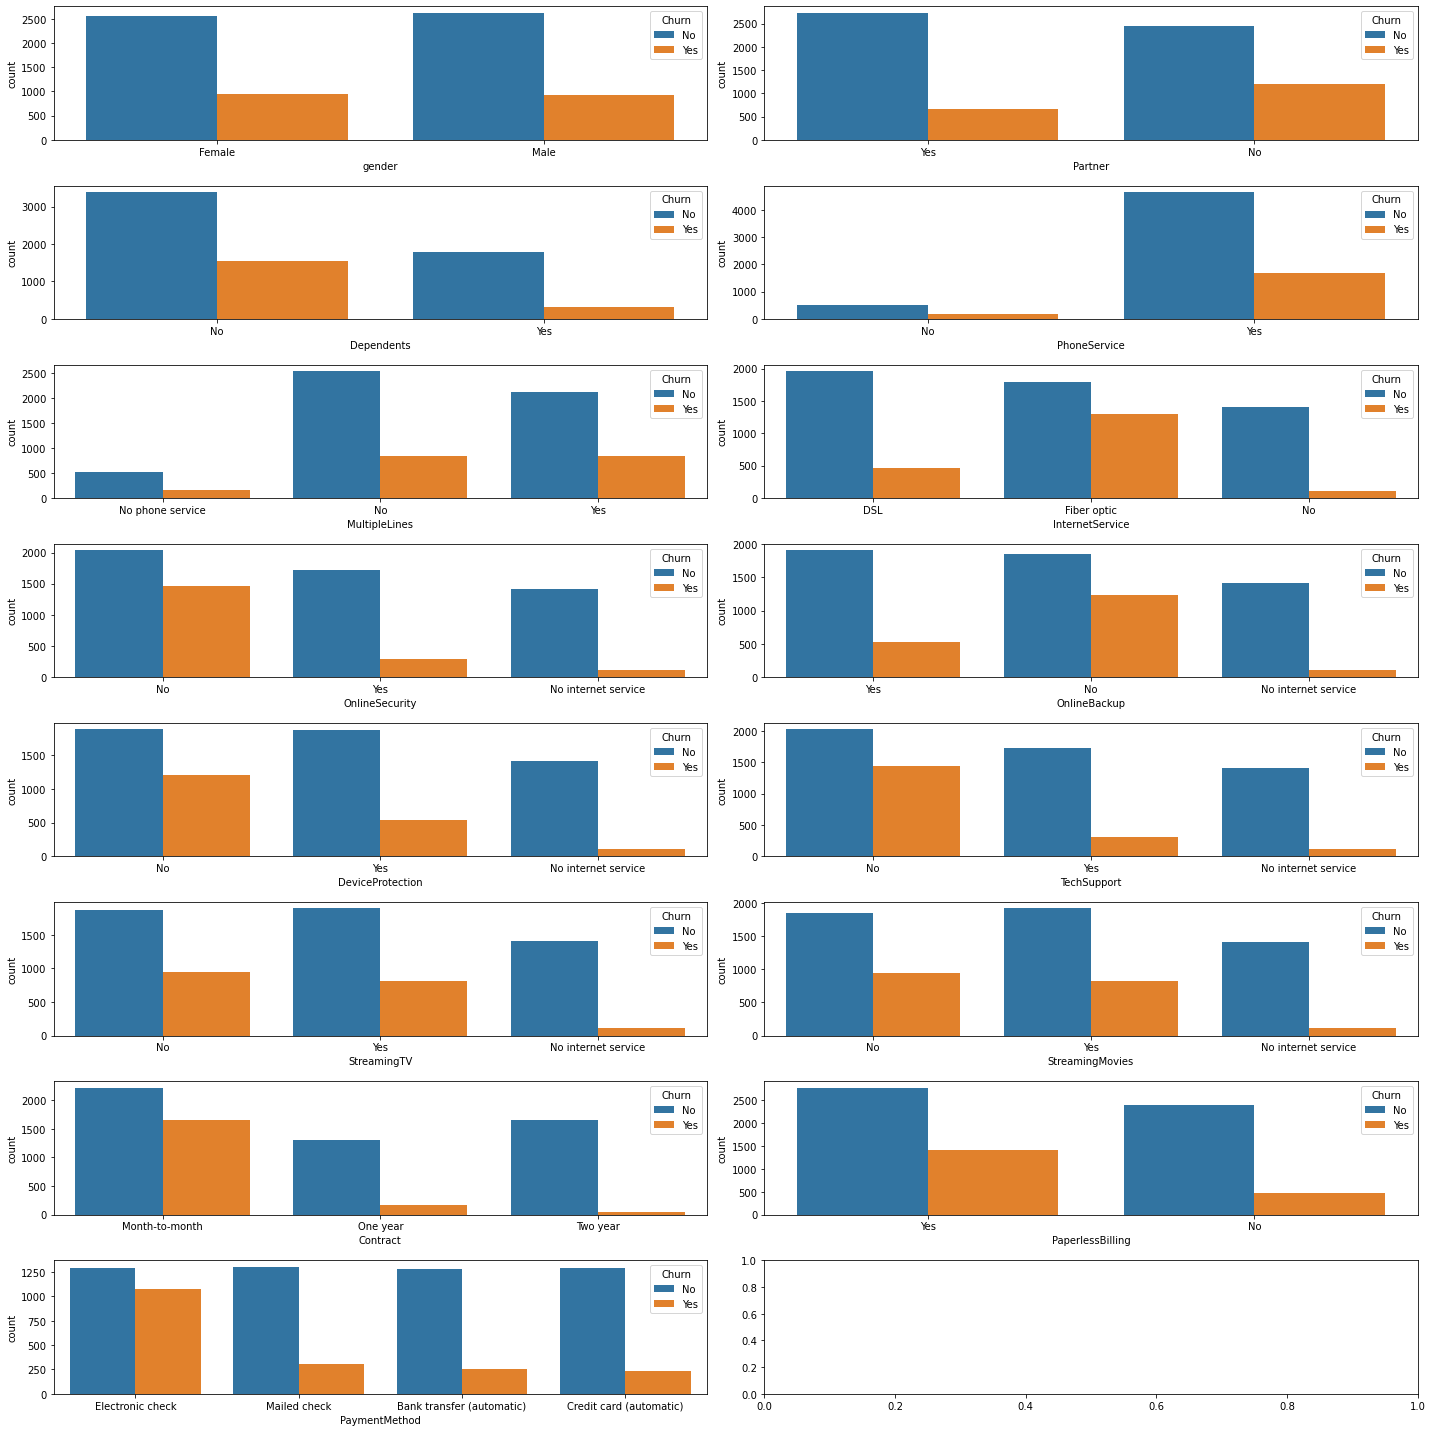

In [12]:
# length = len(categorical_cols)
fig,ax = plt.subplots(nrows= 8,ncols=2,figsize=(20,20))

# for i,cols in enumerate(categorical_cols)
sns.countplot(data=df,x='gender',hue='Churn',ax=ax[0,0])
sns.countplot(data=df,x='Partner',hue='Churn',ax=ax[0,1])
sns.countplot(data=df,x='Dependents',hue='Churn',ax=ax[1,0])
sns.countplot(data=df,x='PhoneService',hue='Churn',ax=ax[1,1])
sns.countplot(data=df,x='MultipleLines',hue='Churn',ax=ax[2,0])
sns.countplot(data=df,x='InternetService',hue='Churn',ax=ax[2,1])
sns.countplot(data=df,x='OnlineSecurity',hue='Churn',ax=ax[3,0])
sns.countplot(data=df,x='OnlineBackup',hue='Churn',ax=ax[3,1])
sns.countplot(data=df,x='DeviceProtection',hue='Churn',ax=ax[4,0])
sns.countplot(data=df,x='TechSupport',hue='Churn',ax=ax[4,1])
sns.countplot(data=df,x='StreamingTV',hue='Churn',ax=ax[5,0])
sns.countplot(data=df,x='StreamingMovies',hue='Churn',ax=ax[5,1])
sns.countplot(data=df,x='Contract',hue='Churn',ax=ax[6,0])
sns.countplot(data=df,x='PaperlessBilling',hue='Churn',ax=ax[6,1])
sns.countplot(data=df,x='PaymentMethod',hue='Churn',ax=ax[7,0])

plt.tight_layout()
plt.show()

In [13]:
numerical_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [14]:
# pip install --upgrade seaborn

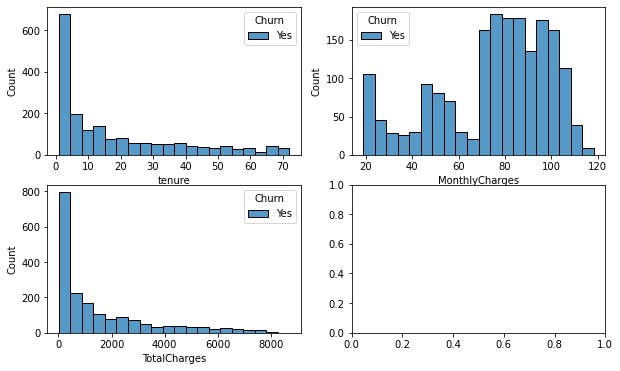

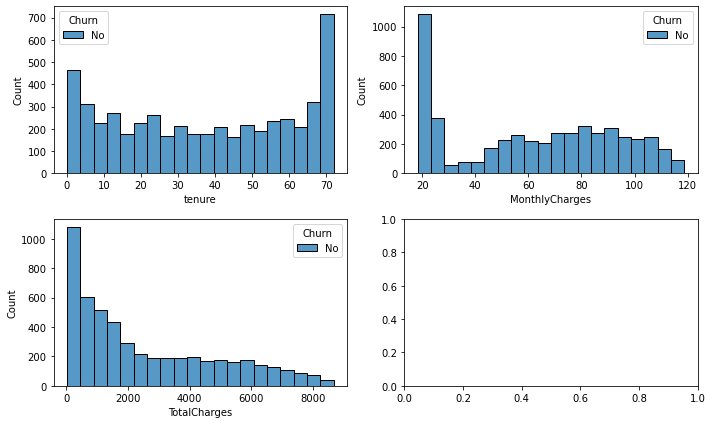

In [15]:
fig,ax_1 = plt.subplots(nrows=2,ncols=2,figsize=(10,6))

df_churn = df[df['Churn'] == 'Yes']
sns.histplot(data=df_churn,x='tenure',hue='Churn',bins=20,ax=ax_1[0,0],multiple='dodge')
sns.histplot(data=df_churn,x='MonthlyCharges',hue='Churn',bins=20,ax=ax_1[0,1],multiple='dodge')
sns.histplot(data=df_churn,x='TotalCharges',hue='Churn',bins=20,ax=ax_1[1,0],multiple='dodge')

fig,ax_2 = plt.subplots(nrows=2,ncols=2,figsize=(10,6))
df_nochurn = df[df['Churn'] == 'No']
sns.histplot(data=df_nochurn,x='tenure',hue='Churn',bins=20,ax=ax_2[0,0],multiple='dodge')
sns.histplot(data=df_nochurn,x='MonthlyCharges',hue='Churn',bins=20,ax=ax_2[0,1],multiple='dodge')
sns.histplot(data=df_nochurn,x='TotalCharges',hue='Churn',bins=20,ax=ax_2[1,0],multiple='dodge')

plt.tight_layout()
plt.show()

# Task 2: Feature Engineering
### Create at least two new, meaningful features from the existing data. 
### Justify why you believe these features might improve model 
### performance.

In [16]:
df["SeniorAlone"] = (
            (df['SeniorCitizen'] == 1) &
            (df['Partner'] == 'No') &
            (df['Dependents'] == 'No')
        ).astype(int)

In [17]:
df['ServiceCount'] = df[service].apply(lambda X : (X == 'Yes').sum(),axis = 1)

In [18]:
df[['SeniorCitizen','Partner','Dependents','SeniorAlone','ServiceCount']]

,SeniorCitizen,Partner,Dependents,SeniorAlone,ServiceCount
0,0,Yes,No,0,1
1,0,No,No,0,3
2,0,No,No,0,3
3,0,No,No,0,3
4,0,No,No,0,1
...,...,...,...,...,...
7038,0,Yes,Yes,0,7
7039,0,Yes,Yes,0,6
7040,0,Yes,Yes,0,1
7041,1,Yes,No,0,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
X = df.drop(columns = ['customerID','Churn'])
y = df['Churn']

In [21]:
X.isna

<bound method DataFrame.isna of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             DSL  

In [22]:
X['TotalCharges'].skew()

0.961642499724251

# Task 3: Building the End-to-End Pipeline 

In [23]:
cat_bin = ['gender','Partner','Dependents','PhoneService','PaperlessBilling']
cat_onehot = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
numeric_cols = ['MonthlyCharges','ServiceCount','tenure']
imputer_col = ['TotalCharges']

In [24]:
class Senior_CitizenAlone(BaseEstimator,TransformerMixin):
    def fit(self,df,y=None):
        return self

    def transform(self,df):
        df = df.copy()
        df["SeniorAlone"] = (
            (df['SeniorCitizen'] == 1) &
            (df['Partner'] == 'No') &
            (df['Dependents'] == 'No')
        ).astype(int)
        return df

In [25]:
class ServiceCount(BaseEstimator,TransformerMixin):
    def __init__(self,service):
        self.service = service
    def fit(self,df,y=None):
        return self
    
    def transform(self,df):
        df = df.copy()
        df['ServiceCount'] = df[service].apply(lambda X : (X == 'Yes').sum(),axis = 1)
        return df

In [26]:
feature_engineering = Pipeline(steps=[
    ('senior_alone',Senior_CitizenAlone()),
    ('service_count',ServiceCount(service = service))
])

simple_imputer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_one = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('cat_col',OneHotEncoder(handle_unknown='ignore'))
])

cat_binary = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('cat_bin',OneHotEncoder(handle_unknown='ignore',drop="if_binary"))
])

num_scaler = Pipeline(steps = [
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num',num_scaler,numeric_cols),
    ('impute',simple_imputer,imputer_col),
    ('onehot_binary',cat_binary,cat_bin),
    ('onehot',cat_one,cat_onehot)
])

models = {
    'LogisticRegression' : LogisticRegression(max_iter = 1000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100,random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100,random_state=42)
}

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [39]:
for name,model in models.items():
    pipeline = Pipeline(steps=[
        ('feature',feature_engineering),
        ('preprocessor',preprocessor),
        ('classifier',model)
    ])
    
    pipeline.fit(X_train,y_train)
    y_predicted = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    print("Result")
    print(f"F1_score: {f1_score(y_test,y_predicted,average='weighted')}")
    print(f"Precision_score: {precision_score(y_test,y_predicted,average='weighted')}")
    print(f"Recall_score: {recall_score(y_test,y_predicted,average='weighted')}")
    print(f"ROC_AUC: {roc_auc_score(y_test,y_proba)}")
    print("--------------------------------------------------------------------------------------------------------")

Result
F1_score: 0.8097794026853734
Precision_score: 0.8080506932181153
Recall_score: 0.8149550402271651
ROC_AUC: 0.8584718345094896
--------------------------------------------------------------------------------------------------------
Result
F1_score: 0.7783749779165898
Precision_score: 0.7771655741590129
Recall_score: 0.7893989588263133
ROC_AUC: 0.828374572383986
--------------------------------------------------------------------------------------------------------
Result
F1_score: 0.7944741819155511
Precision_score: 0.7936508282771616
Recall_score: 0.8035967818267865
ROC_AUC: 0.8571717233463062
--------------------------------------------------------------------------------------------------------


# Task 4: Model Selection and Hyperparameter Tuning

In [40]:
gd_gradient =  {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['lbfgs', 'liblinear']
}

pipeline = Pipeline(steps=[
    ('feature',feature_engineering),
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

gd = GridSearchCV(pipeline,gd_gradient,n_jobs=-1,cv=3,verbose=3,scoring='f1_weighted')
gd.fit(X_train,y_train)
y_predicted = gd.predict(X_test)
y_proba = gd.predict_proba(X_test)[:, 1]

print("Result:")
print(f"F1_score: {f1_score(y_test,y_predicted,average='weighted')}")
print(f"Precision_score: {precision_score(y_test,y_predicted,average='weighted')}")
print(f"Recall_score: {recall_score(y_test,y_predicted,average='weighted')}")
print(f"ROC_AUC: {roc_auc_score(y_test,y_proba)}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Result:
F1_score: 0.8097794026853734
Precision_score: 0.8080506932181153
Recall_score: 0.8149550402271651
ROC_AUC: 0.8584695704935328


# Imbalance Class
#### When the classes were imbalanced the logstic regression performed the best, as random forest anf gradient boosting tend to look for the positive class and in logistic regression we are taking the probability so it is not bothered by class.So, we need to handle class imbalance as RandomForest and logistic regression are performing as per the need.

# Task 5: Handling Class Imbalance

In [133]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
  Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [41]:
import imblearn.pipeline as pl 
from imblearn.over_sampling import SMOTE

In [69]:
resample = SMOTE(random_state=42)

feature_engineering = pl.Pipeline(steps=[
    ('senior_alone',Senior_CitizenAlone()),
    ('service_count',ServiceCount(service = service))
])

simple_imputer = pl.Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_one = pl.Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('cat_col',OneHotEncoder(handle_unknown='ignore'))
])

cat_binary = pl.Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('cat_bin',OneHotEncoder(handle_unknown='ignore',drop="if_binary"))
])

num_scaler = pl.Pipeline(steps = [
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num',num_scaler,numeric_cols),
    ('impute',simple_imputer,imputer_col),
    ('onehot_binary',cat_binary,cat_bin),
    ('onehot',cat_one,cat_onehot)
])

models = {
    'LogisticRegression' : LogisticRegression(max_iter = 1000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100,random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100,random_state=42)
}

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

for name,model in models.items():
    pipeline = pl.Pipeline(steps=[
        ('senior_alone',Senior_CitizenAlone()),
        ('service_count',ServiceCount(service = service)),
        ('preprocessor',preprocessor),
        ('resampler',resample),
        ('classifier',model)
    ])
    
    pipeline.fit(X_train,y_train)
    y_predicted = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    print("Result")
    print(f"F1_Score: {f1_score(y_test,y_predicted,average='weighted')}")
    print(f"Precision_score: {precision_score(y_test,y_predicted,average='weighted')}")
    print(f"Recall_score: {recall_score(y_test,y_predicted,average='weighted')}")
    print("-----------------------------------------------------------------------------------------------------------------")

Result
F1_Score: 0.771279549287691
Precision_score: 0.8159072367362051
Recall_score: 0.759110269758637
-----------------------------------------------------------------------------------------------------------------
Result
F1_Score: 0.7792113154853232
Precision_score: 0.7775136694983531
Recall_score: 0.7813535257927118
-----------------------------------------------------------------------------------------------------------------
Result
F1_Score: 0.7948219483806402
Precision_score: 0.8048918845217528
Recall_score: 0.7893989588263133
-----------------------------------------------------------------------------------------------------------------


# Analysis for the Score
#### After applying the resample on the dataset, Gradient Boosting and Random Forest are working correctly as needed, we can see that the F1_score for the logistic regression also dropped.

#### As the data is not imbalanced we see the Recall for the logistic regression has also dropped as it may not simply predict the majoritt class.(If the class is imbalance then the model may predict the majority of the class and we may get high accuracy with low precision and low recall.)

#### So ,I have applied SMOTE which keeps the majoirty data as it is,but generate the synthetic data for the minority class.

In [71]:
gd_gradient =  {
    'classifier__n_estimators': [100,500],
    'classifier__max_depth' : [3,5],
    'classifier__learning_rate' : [.01,.1,.2]
}

pipeline = pl.Pipeline(steps=[
    ('senior_alone',Senior_CitizenAlone()),
    ('service_count',ServiceCount(service = service)),
    ('preprocessor',preprocessor),
    ('resampler',resample),
    ('classifier',GradientBoostingClassifier())
])

gd = GridSearchCV(pipeline,gd_gradient,n_jobs=-1,cv=3,verbose=3,scoring='f1_weighted')
gd.fit(X_train,y_train)
y_predicted = gd.predict(X_test)

print("Result:")
print(f"F1_score: {f1_score(y_test,y_predicted,average='weighted')}")
print(f"Precision_score: {precision_score(y_test,y_predicted,average='weighted')}")
print(f"Recall_score: {recall_score(y_test,y_predicted,average='weighted')}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Result:
F1_score: 0.7948219483806402
Precision_score: 0.8048918845217528
Recall_score: 0.7893989588263133


## Task 6: Final Evaluation and Interpretation 
## 1. Test Set Evaluation: Evaluate your final, tuned pipeline (with 
## the imbalance handling) on the held-out test set. 
## 2. Metrics Report: Report the following metrics: Precision, 
## Recall, F1-Score, and the ROC AUC score. Also, display the 
## Classification Report and Confusion Matrix. 
## 3. Interpretation: 
## ○ Analyze the confusion matrix. In the context of customer 
## churn, what is the business cost of a False Positive versus 
## a False Negative? Which one is worse? 
## ○ If your final model was a tree-based ensemble (like 
## Random Forest or Gradient Boosting), extract and 
## visualize the top 10 most important features. Discuss 
## what these features tell you about the main drivers of 
## customer churn.

Text(0.5, 1.0, 'Confusion Matrix for GradientBoostingClassifier')

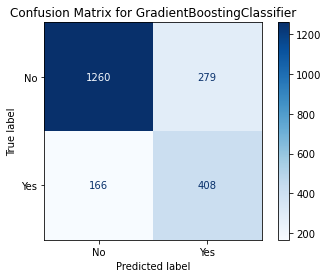

In [72]:
cm = confusion_matrix(y_test,y_predicted, labels = gd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = gd.classes_)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix for {name}")

# Analysis for Confusion Matrix
#### True_Positive = Customers correctly predicted as churning
#### True_Negative = Customer predicted churning but actually stayed
#### False_Positive = Customer correctly predicted as not churning
#### False_Negative = Customer predicted not churning but actually churned

#### Bussiness Cost:
#### False_Positive - These more need as company need to retain the customer by offering them some attractive offers.
#### False_negative - These is actually harming the company as its states that the customer is not churning but it has churned in fact.

#### Which one is the Worst?
#### Actually, False_Negative is the worst.

In [86]:
best_model = gd.best_estimator_

importance = best_model.named_steps['classifier'].feature_importances_

preprocessor = best_model.named_steps['preprocessor']
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['MonthlyCharges', 'ServiceCount', 'tenure']),
                                ('impute',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['TotalCharges']),
                                ('onehot_binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_bin',
                                                  OneHotEncoder(drop='if_...
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'PaperlessBilling']),
                                ('onehot',
                   

In [87]:
numeric_feature = preprocessor.transformers_[0][2]   
imputed_feature = preprocessor.transformers_[1][2]  

binary_encoded = preprocessor.named_transformers_['onehot_binary'].named_steps['cat_bin']
binary_feature = binary_encoded.get_feature_names_out(
    preprocessor.transformers_[2][2]   
)

onehot_encoded = preprocessor.named_transformers_['onehot'].named_steps['cat_col']
onehot_feature = onehot_encoded.get_feature_names_out(
    preprocessor.transformers_[3][2]   
)

all_features = (
    list(numeric_feature) +
    list(imputed_feature) +
    list(binary_features) +
    list(onehot_feature)
)

In [88]:
feature_importance_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

In [91]:
df_top5 = feature_importance_df.head(10)

<AxesSubplot:xlabel='Importance', ylabel='Feature'>

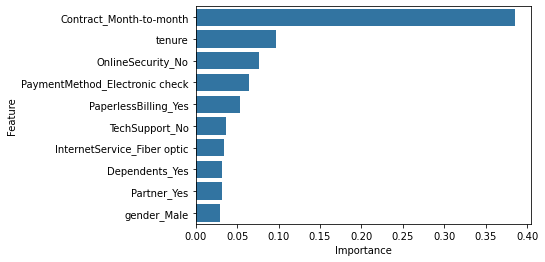

In [92]:
sns.barplot(data=df_top5,x='Importance',y='Feature',orient='h')

# Analysis for the Above Graph
#### From the above horizontal graph it can be infered that Contract_Month-to-Month is important predictor.That is customer with contract month-to-month are more likely to be churn.
#### Then followed by the tenure.Lower the tenure higher is the churn.
#### Customer withoth online security service have higher churn rates.

In [93]:
df_top5

,Feature,Importance
35,Contract_Month-to-month,0.384782
2,tenure,0.097038
17,OnlineSecurity_No,0.075794
40,PaymentMethod_Electronic check,0.064490
8,PaperlessBilling_Yes,0.053531
26,TechSupport_No,0.036981
15,InternetService_Fiber optic,0.034315
6,Dependents_Yes,0.031194
5,Partner_Yes,0.031194
4,gender_Male,0.029548
